In [1]:
import pandas as pd
import json
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.cluster.hierarchy as sch
import sqlite3
import warnings
from scipy import stats
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import sqlite3

# Caminho para o banco de dados
db_path = '/Users/leonardooliveira/Desktop/PBI-EXAI/Projeto-BI/preparacao/Experimentai.db'
conn = sqlite3.connect(db_path)

# Leitura das tabelas do banco de dados
df_gosto = pd.read_sql_query("SELECT * FROM dim_gosto_base_nova;", conn)
df_demografico = pd.read_sql_query("SELECT * FROM dim_demografico_base_nova;", conn)
df_cliente_fato = pd.read_sql_query("SELECT * FROM fato_base_nova;", conn)

# Fechar a conexão com o banco de dados
conn.close()

# Fazer o merge usando outer join para incluir todas as linhas
base = pd.merge(df_cliente_fato, df_gosto, on='id_gosto_base', how='inner')
base = pd.merge(base, df_demografico, on='id_demografico_base', how='inner')
base.isnull().sum()


id_fato_base                0
id_demografico_base         0
id_gosto_base               0
data_inscricao              0
rede_social                 0
renda_id                    0
objetivo_id                 0
tem_cupom                   0
assinantes                  0
moda                        0
pessoa_artistica            0
maquiagem                   0
brinquedos_ou_jogos         0
esportes                    0
tem_pet                     0
decorar_casa                0
alimento_saudavel           0
gastronomia                 0
carro                       0
bebida_alcoolica            0
cuidados_pessoais           0
tecnologia                  0
mae_ou_pai                  0
influencer                  0
restricoes_alimentares      0
nome                        0
sobrenome                   0
data_nascimento             6
genero                      0
cidade                      0
estado                      0
bairro                      0
idade                       6
faixa_etar

In [3]:
base.columns

Index(['id_fato_base', 'id_demografico_base', 'id_gosto_base',
       'data_inscricao', 'rede_social', 'renda_id', 'objetivo_id', 'tem_cupom',
       'assinantes', 'moda', 'pessoa_artistica', 'maquiagem',
       'brinquedos_ou_jogos', 'esportes', 'tem_pet', 'decorar_casa',
       'alimento_saudavel', 'gastronomia', 'carro', 'bebida_alcoolica',
       'cuidados_pessoais', 'tecnologia', 'mae_ou_pai', 'influencer',
       'restricoes_alimentares', 'nome', 'sobrenome', 'data_nascimento',
       'genero', 'cidade', 'estado', 'bairro', 'idade', 'faixa_etaria'],
      dtype='object')

In [4]:
del base['id_fato_base']
del base['data_inscricao']
del base['id_gosto_base']
del base['id_demografico_base']
del base['faixa_etaria']
del base['nome']
del base['sobrenome']


In [5]:
base = base.dropna()

In [6]:
assinantes = base[base['assinantes'] == 1]


In [7]:
assinantes.head()

,rede_social,renda_id,objetivo_id,tem_cupom,assinantes,moda,pessoa_artistica,maquiagem,brinquedos_ou_jogos,esportes,...,tecnologia,mae_ou_pai,influencer,restricoes_alimentares,data_nascimento,genero,cidade,estado,bairro,idade
5,0,Superior a R$24.000,Quero dar a minha opinião sobre produtos,0,1,1,0,0,1,1,...,0,0,1,Amendoim,2004-03-30 00:00:00,Feminino,Piracaia,São Paulo,Centro,20.0
425,0,R$0 - 3.000,Quero dar a minha opinião sobre produtos,0,1,1,1,1,1,1,...,1,0,1,Outro,2001-03-19 00:00:00,Feminino,Sao paulo,São Paulo,Santo Amaro,23.0
575,0,R$3.000 - 8.000,Quero descobrir novos produtos para comprar,0,1,1,0,1,1,1,...,0,0,0,,1994-03-09 00:00:00,Feminino,São Paulo,São Paulo,Chácara Califórnia,30.0
621,0,R$8.000 - 16.000,Quero dar a minha opinião sobre produtos,0,1,1,1,1,0,1,...,1,0,1,,1965-09-25 00:00:00,Masculino,Indaiatuba,São Paulo,Jardim Residencial Santa Clara,59.0
675,1,R$0 - 3.000,Quero dar a minha opinião sobre produtos,1,1,1,1,0,1,1,...,1,0,1,,1996-10-19 00:00:00,Feminino,São José dos Campos,São Paulo,Condomínio Royal Park,28.0


In [8]:
assinantes = assinantes[(assinantes['idade'] >= 37)&( assinantes['idade'] < 47)]

In [9]:
assinantes['restricoes_alimentares'] = assinantes['restricoes_alimentares'].fillna("Não tenho restrição")

In [10]:
assinantes.isnull().sum()

rede_social               0
renda_id                  0
objetivo_id               0
tem_cupom                 0
assinantes                0
moda                      0
pessoa_artistica          0
maquiagem                 0
brinquedos_ou_jogos       0
esportes                  0
tem_pet                   0
decorar_casa              0
alimento_saudavel         0
gastronomia               0
carro                     0
bebida_alcoolica          0
cuidados_pessoais         0
tecnologia                0
mae_ou_pai                0
influencer                0
restricoes_alimentares    0
data_nascimento           0
genero                    0
cidade                    0
estado                    0
bairro                    0
idade                     0
dtype: int64

In [11]:
assinantes.columns

Index(['rede_social', 'renda_id', 'objetivo_id', 'tem_cupom', 'assinantes',
       'moda', 'pessoa_artistica', 'maquiagem', 'brinquedos_ou_jogos',
       'esportes', 'tem_pet', 'decorar_casa', 'alimento_saudavel',
       'gastronomia', 'carro', 'bebida_alcoolica', 'cuidados_pessoais',
       'tecnologia', 'mae_ou_pai', 'influencer', 'restricoes_alimentares',
       'data_nascimento', 'genero', 'cidade', 'estado', 'bairro', 'idade'],
      dtype='object')

In [12]:
assinantes['objetivo_id'] = assinantes['objetivo_id'].apply(lambda x: 1 if x == 'Quero dar a minha opinião sobre produtos' else 0)
assinantes['genero'] = assinantes['genero'].apply(lambda x: 1 if x == 'Feminino' else 0)


In [13]:
assinantes.head(5)

,rede_social,renda_id,objetivo_id,tem_cupom,assinantes,moda,pessoa_artistica,maquiagem,brinquedos_ou_jogos,esportes,...,tecnologia,mae_ou_pai,influencer,restricoes_alimentares,data_nascimento,genero,cidade,estado,bairro,idade
2171,0,R$3.000 - 8.000,1,0,1,1,1,1,1,0,...,0,0,0,,1986-04-01 00:00:00,1,Ribeirão Preto,São Paulo,Jardim Marchesi,38.0
3059,0,R$3.000 - 8.000,1,0,1,1,1,1,0,1,...,0,0,0,Não tenho restrição,1987-08-07 00:00:00,0,São paulo,São Paulo,Jardim adalfiore,37.0
3875,0,R$8.000 - 16.000,1,0,1,1,1,1,0,1,...,0,0,1,,1983-04-27 00:00:00,1,São Paulo,São Paulo,Vila Nova Galvão,41.0
3888,0,Superior a R$24.000,1,0,1,1,1,1,1,1,...,0,0,0,,1980-02-22 00:00:00,1,Petrópolis 25b,Rio de Janeiro,Estrada da Saudade,44.0
4688,1,R$3.000 - 8.000,1,0,1,1,1,1,1,1,...,1,0,1,Não tenho restrição,1982-10-30 00:00:00,1,Duque de Caxias,Rio de Janeiro,Centro,42.0


In [14]:
assinantes.columns

Index(['rede_social', 'renda_id', 'objetivo_id', 'tem_cupom', 'assinantes',
       'moda', 'pessoa_artistica', 'maquiagem', 'brinquedos_ou_jogos',
       'esportes', 'tem_pet', 'decorar_casa', 'alimento_saudavel',
       'gastronomia', 'carro', 'bebida_alcoolica', 'cuidados_pessoais',
       'tecnologia', 'mae_ou_pai', 'influencer', 'restricoes_alimentares',
       'data_nascimento', 'genero', 'cidade', 'estado', 'bairro', 'idade'],
      dtype='object')

In [15]:
features = assinantes[[ 
'esportes',
'cuidados_pessoais',
'gastronomia',
'renda_id',
'genero',
'idade',
'moda',
'decorar_casa',
'tem_pet'
]]

In [16]:
features = pd.get_dummies(features, columns=[
'esportes',
'cuidados_pessoais',
'gastronomia',
'renda_id',
'genero',
'moda',
'decorar_casa',
'tem_pet'
], drop_first=True)

In [17]:
features['idade'] = stats.zscore(features['idade'])

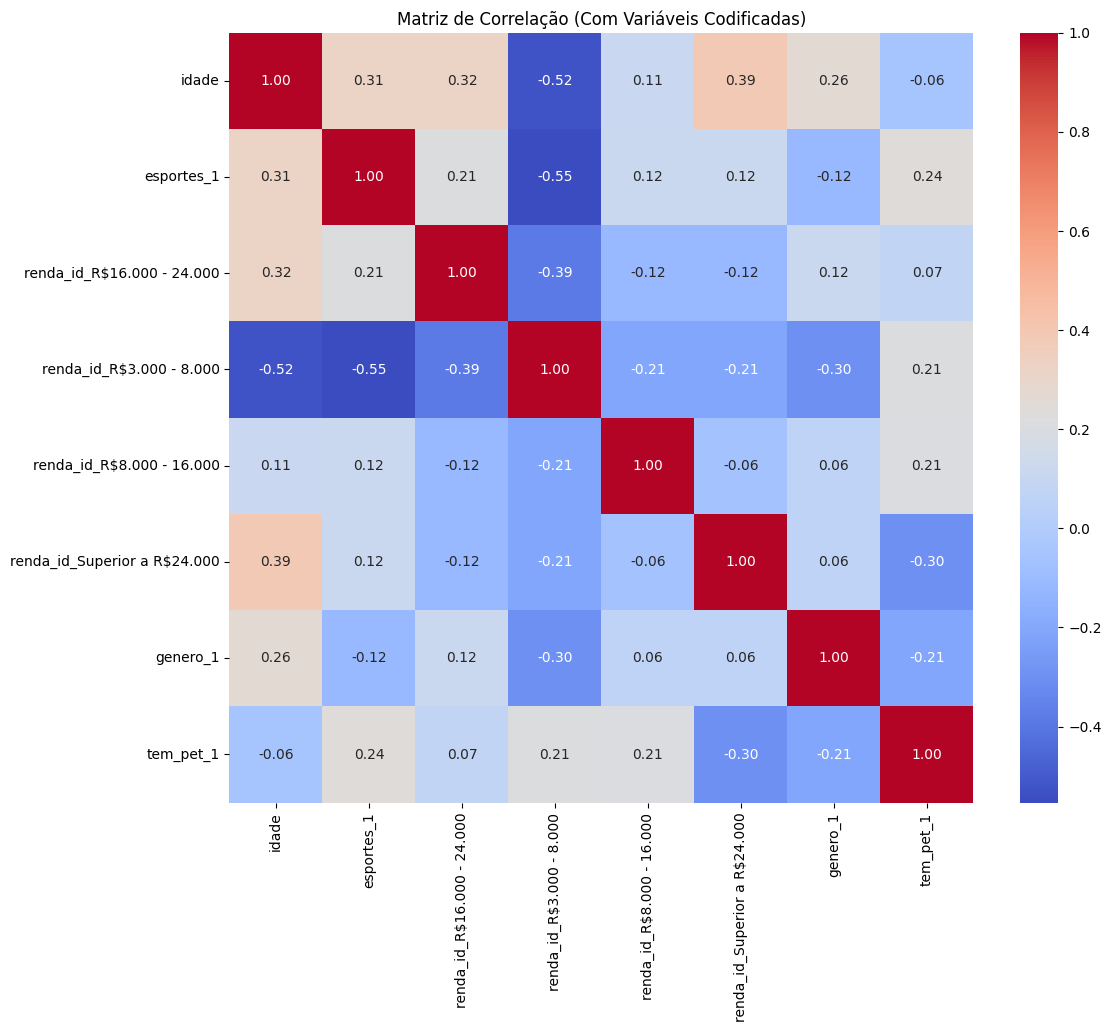

In [18]:
# Calcular a matriz de correlação
correlation_matrix = features.corr()

# Visualizar como heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação (Com Variáveis Codificadas)")
plt.show()


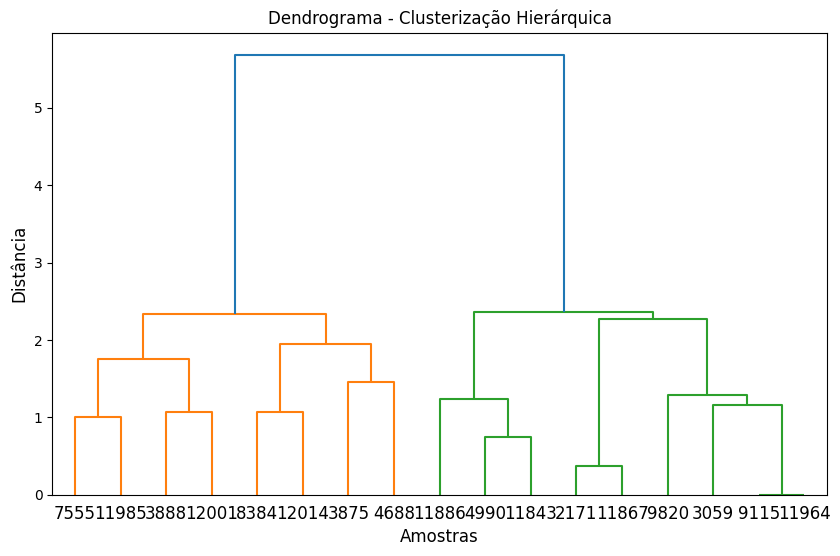

In [19]:
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(
    sch.linkage(features, method='ward', metric='euclidean'),
    orientation='top',  # Altere para 'left', 'right', 'top' ou 'bottom'
    labels=list(features.index) if hasattr(features, 'index') else None
)
plt.title('Dendrograma - Clusterização Hierárquica', fontsize=12)
plt.xlabel('Amostras', fontsize=12)
plt.ylabel('Distância', fontsize=12)
plt.axhline(y=15, color='red', linestyle='--')  # Defina o corte desejado
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering

# Ajustar o modelo de clusterização hierárquica
clusters = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')

# Obter os rótulos dos clusters
assinantes['cluster'] = clusters.fit_predict(features)


In [21]:
assinantes.columns

Index(['rede_social', 'renda_id', 'objetivo_id', 'tem_cupom', 'assinantes',
       'moda', 'pessoa_artistica', 'maquiagem', 'brinquedos_ou_jogos',
       'esportes', 'tem_pet', 'decorar_casa', 'alimento_saudavel',
       'gastronomia', 'carro', 'bebida_alcoolica', 'cuidados_pessoais',
       'tecnologia', 'mae_ou_pai', 'influencer', 'restricoes_alimentares',
       'data_nascimento', 'genero', 'cidade', 'estado', 'bairro', 'idade',
       'cluster'],
      dtype='object')

In [22]:
cluster1 = assinantes[assinantes['cluster'] == 0]
cluster2 = assinantes[assinantes['cluster'] == 1]

In [23]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Ajustar o modelo hierárquico
linkage_matrix = linkage(features, method='ward')

for n_clusters in range(2, 10):
    # Ajustar o modelo cortando em n_clusters
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agglomerative.fit_predict(features)
    
    # Calcular o silhouette score
    silhouette_avg = silhouette_score(features, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}")



For n_clusters = 2, the silhouette score is 0.3715815432897717
For n_clusters = 3, the silhouette score is 0.2505565533577966
For n_clusters = 4, the silhouette score is 0.2005395450165593
For n_clusters = 5, the silhouette score is 0.277553789629446
For n_clusters = 6, the silhouette score is 0.29185281009776226
For n_clusters = 7, the silhouette score is 0.29945392039183055
For n_clusters = 8, the silhouette score is 0.29623127196309806
For n_clusters = 9, the silhouette score is 0.28079480089894215


Variância Explicada: [0.21933405 0.18556042]


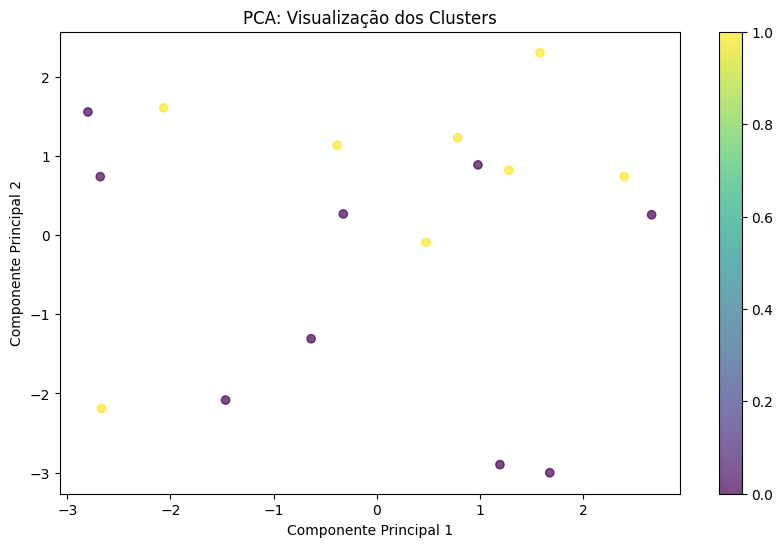

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Selecionar apenas as colunas numéricas presentes no DataFrame
numeric_columns = [
    'rede_social', 'tem_cupom', 
    'moda', 'pessoa_artistica', 'maquiagem', 'brinquedos_ou_jogos',
    'esportes', 'tem_pet', 'decorar_casa', 'alimento_saudavel',
    'gastronomia', 'carro', 'bebida_alcoolica', 'cuidados_pessoais',
    'tecnologia', 'mae_ou_pai', 'influencer', 'genero', 'idade'
]

# Verificar se as colunas existem no DataFrame
numeric_columns = [col for col in numeric_columns if col in assinantes.columns]

# Criar um DataFrame apenas com as colunas numéricas existentes
pca_data = assinantes[numeric_columns].copy()


# Certificar-se de que todas as colunas são numéricas
for col in pca_data.columns:
    if pca_data[col].dtype == 'object':
        # Aplicar codificação (ex.: one-hot encoding ou mapeamento manual)
        pca_data[col] = pd.factorize(pca_data[col])[0]

# Normalizar os dados antes do PCA
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# Criar o modelo PCA
pca = PCA(n_components=2)  # Reduzir para 2 componentes principais
pca_result = pca.fit_transform(pca_data_scaled)

# Adicionar os componentes principais ao DataFrame original
assinantes['PCA1'] = pca_result[:, 0]
assinantes['PCA2'] = pca_result[:, 1]

# Visualizar a variância explicada
explained_variance = pca.explained_variance_ratio_
print(f"Variância Explicada: {explained_variance}")

# Criar um scatter plot para visualizar os clusters com os componentes principais
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(assinantes['PCA1'], assinantes['PCA2'], c=assinantes['cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.title('PCA: Visualização dos Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [25]:
print(type(assinantes))


<class 'pandas.core.frame.DataFrame'>


Contribuição das Variáveis para os Componentes Principais:
      rede_social     tem_cupom  moda  pessoa_artistica  maquiagem  \
PCA1     0.187424 -5.551115e-17  -0.0          0.033192   0.217187   
PCA2    -0.213694 -1.110223e-16   0.0          0.510253   0.210748   

      brinquedos_ou_jogos  esportes   tem_pet  decorar_casa  \
PCA1             0.379126 -0.112099  0.073577 -0.000000e+00   
PCA2            -0.232390  0.428280  0.291306  8.673617e-19   

      alimento_saudavel  gastronomia     carro  bebida_alcoolica  \
PCA1           -0.07116         -0.0  0.357985          0.386964   
PCA2           -0.24222          0.0 -0.261595          0.082024   

      cuidados_pessoais  tecnologia  mae_ou_pai  influencer    genero  \
PCA1               -0.0    0.494316    0.344097    0.189583  0.227894   
PCA2                0.0    0.024440    0.224204    0.234014 -0.150039   

         idade  
PCA1  0.145936  
PCA2  0.255548  


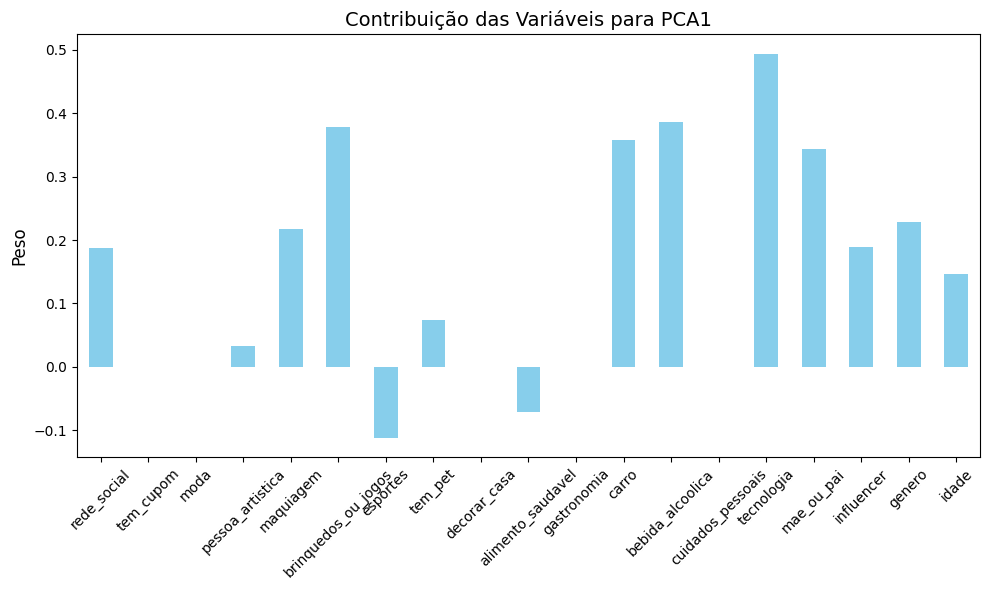

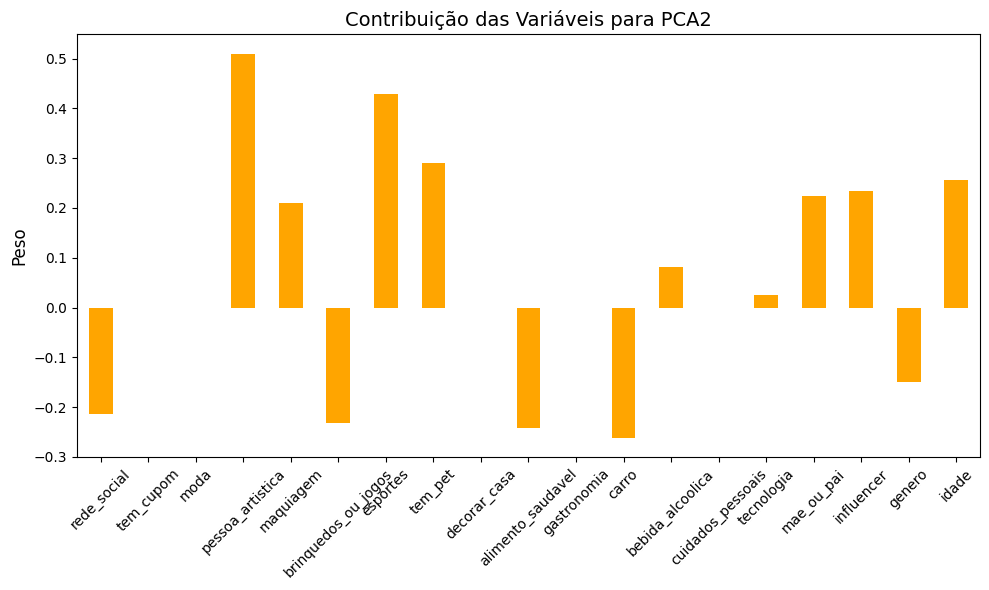

In [26]:
# Obter os loadings (pesos das variáveis para cada componente)
loadings = pd.DataFrame(pca.components_, columns=numeric_columns, index=['PCA1', 'PCA2'])

# Exibir a contribuição das variáveis para os componentes
print("Contribuição das Variáveis para os Componentes Principais:")
print(loadings)

# Visualizar os loadings como um gráfico
plt.figure(figsize=(10, 6))
loadings.loc['PCA1'].plot(kind='bar', color='skyblue')
plt.title('Contribuição das Variáveis para PCA1', fontsize=14)
plt.ylabel('Peso', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
loadings.loc['PCA2'].plot(kind='bar', color='orange')
plt.title('Contribuição das Variáveis para PCA2', fontsize=14)
plt.ylabel('Peso', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [27]:
# import matplotlib.pyplot as plt

# # Função para criar gráficos de pizza com porcentagem
# def plot_pie(data, column):
#     plt.figure(figsize=(8, 8))
#     data[column].value_counts().plot(
#         kind='pie',
#         autopct='%1.1f%%',
#         startangle=90,
#         colors=plt.cm.Paired.colors
#     )
#     plt.title(f'Distribuição de {column}', fontsize=14)
#     plt.ylabel('')  # Remover o rótulo do eixo y
#     plt.tight_layout()
#     plt.show()



# # Criar gráficos de pizza para as colunas restantes
# for column in columns_to_plot_pie:
#     if column in cluster1.columns:
#         plot_pie(cluster1, column)
